### Variational Monte Carlo Methods

In [6]:
import numpy as np
import random, math
import pylab

In [5]:
def gauss(sigma):
        phi=random.uniform(0, 2*math.pi)
        Upsilon=-math.log(random.uniform(0, 1))
        r=sigma*math.sqrt(2*Upsilon)
        x=r*math.cos(phi)
        y=r*math.sin(phi)
        return math.sqrt(x**2+y**2)

### 1. The harmonic Oscillator in 1D.

#### Hamiltonian: $$\hat{H}=-\frac{\hbar^2}{2m}+\frac{1}{2}kx^2$$
$$m=\hbar=k=1$$ 
#### Trial wave function: $$\Psi_T(x)=\frac{\sqrt{\alpha}}{\pi^{1/4}}e^{-x^2\alpha^2/2}$$
#### Local Energy:$$\hat{E_L(x)}=\frac{1}{\Psi_T(x)}\hat{H}\Psi_T(x)=\alpha^2+x^2(\frac{1}{2}-\alpha^4)$$
$$<\hat{E_L(x)}>=\int_{-\infty}^{\infty}|\Psi_T(x)|^2(\alpha^2+x^2(\frac{1}{2}-\alpha^4))$$

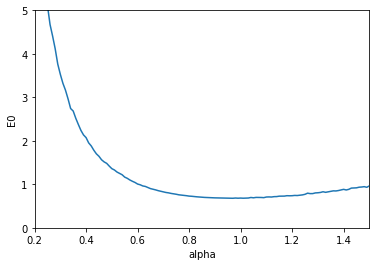

In [42]:
N=10000 # No. of Monte Carlo samples

def MC(alpha):
    E, E2=0., 0.
    for i in range(10000):
        x=gauss(-1)/math.sqrt(math.pi)/alpha
        E_L=alpha**2+x**2*(0.5-alpha**4)
        E+=E_L
        E2+=E_L**2
    return [alpha, E/N, math.sqrt((E2/N-(E/N)**2))/N]

parameters=np.arange(0.2, 1.6, 0.01)
Mean_Energy=[]
for alpha in parameters:
    X=MC(alpha)
    #print(X)
    Mean_Energy+=[X[1], ]

pylab.plot(parameters, Mean_Energy)
pylab.xlim(0.2, 1.5)
pylab.ylim(0, 5)
pylab.xlabel("alpha")
pylab.ylabel("E0")
pylab.show()


### 2. Ground State Energy of the dirac delta function potential

#### Hamiltonian: $$\hat{H}=-\frac{\hbar^2}{2m}-k\delta(x)$$
$$m=\hbar=k=1$$ 
#### Trial wave function: $$\Psi_T(x)=\frac{\sqrt{\alpha}}{\pi^{1/4}}e^{-x^2\alpha^2/2}$$
#### Local Energy:$$\hat{E_L(x)}=\frac{1}{\Psi_T(x)}\hat{H}\Psi_T(x)=\alpha^2-x^2\alpha^4-1$$
$$<\hat{E_L(x)}>=\int_{-\infty}^{\infty}|\Psi_T(x)|^2(\alpha^2-x^2\alpha^4-1)$$

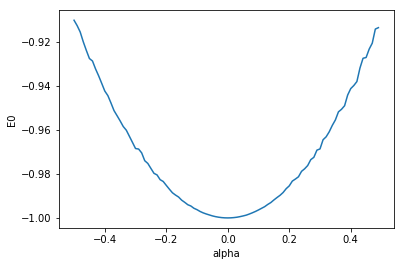

In [45]:
N=10000 # No. of Monte Carlo samples

def MC(alpha):
    E, E2=0., 0.
    for i in range(10000):
        x=gauss(-1)/math.sqrt(math.pi)/alpha
        E_L=alpha**2-x**2*alpha**4-1
        E+=E_L
        E2+=E_L**2
    return [alpha, E/N, math.sqrt((E2/N-(E/N)**2))/N]

parameters=np.arange(-0.5, 0.5, 0.01)
Mean_Energy=[]
for alpha in parameters:
    X=MC(alpha)
    #print(X)
    Mean_Energy+=[X[1], ]

pylab.plot(parameters, Mean_Energy)
pylab.xlabel("alpha")
pylab.ylabel("E0")
pylab.show()